# Home assignment 6

This journal covers the home assignment 6. 

We start with loading the modules that we would need:

In [2]:
# set up the environment
# some of these packages are not required, 
# I like to keep the stuff I use under the comments and uncomment it whenever I need it

# pandas is the module that deals with storing data in a structured way; think of it as excel and sql for python
import pandas as pd
# Display 5 columns for viewing purposes
# pd.set_option('display.max_columns', 5)
# Reduce decimal points to 2
pd.options.display.float_format = '{:,.2f}'.format


# numpy is for all the numerical stuff 
import numpy as np
# this package is useful for importing RData files 
# to install it run: pip install pyreadr
# import pyreadr

import glob

# import statistical tools (these include regressions that we'll run to estimate the production function)
import scipy as sp
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.gmm import IV2SLS
#from linearmodels.panel import PanelOLS

from sklearn.preprocessing import PolynomialFeatures

# import seaborn as sns
# import locale
# from sklearn.decomposition import PCA
# from sklearn import preprocessing
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error

# sns.set_theme(style="darkgrid")

# matplotlib is for plotting pretty figures and pictures
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
# plt.rcParams['text.usetex'] = True

# this is to tell python where TeX distribution is in case you need to use LaTeX in your figures
import os
# os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

Now we are ready to load the data. This will be done using a function from `panda` package

In [4]:
#import the data from csv
data_path = "/Users/uctpnr1/Library/CloudStorage/Dropbox/teaching/ECON0072/2023-24/data" # path to data files
data_files = glob.glob(os.path.join(data_path, "FISH*.DTA")) #get a list of all the files in case there are several
raw_data = pd.concat((pd.read_stata(f) for f in data_files), ignore_index=True) #load and concatenate them using a loop
raw_data.head() #display the first 20 lines of the dataset



,prca,prcw,qtya,qtyw,mon,tues,wed,thurs,speed2,wave2,speed3,wave3,avgprc,totqty,lavgprc,ltotqty,t,lavgp_1,gavgprc,gavgp_1
0,0.62,0.77,1875,2205,1,0,0,0,15,7.50,20,9.00,0.70,4080,-0.36,8.31,1,NaN,NaN,NaN
1,0.97,1.17,2900,566,0,0,1,0,10,5.00,20,7.50,1.01,3466,0.01,8.15,2,-0.36,0.36,NaN
2,1.23,1.48,770,1525,0,0,0,1,10,6.00,20,4.00,1.39,2295,0.33,7.74,3,0.01,0.33,0.36
3,1.93,1.62,927,943,0,0,0,0,15,6.00,20,5.00,1.78,1870,0.57,7.53,4,0.33,0.24,0.33
4,0.80,0.86,4220,2665,1,0,0,0,10,3.50,20,3.50,0.83,6885,-0.19,8.84,5,0.57,-0.76,0.24


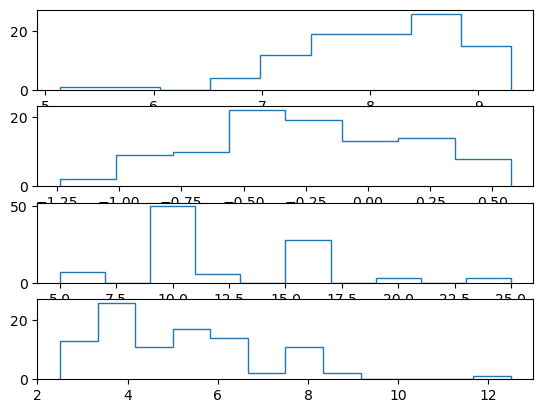

In [12]:
fig, ax = plt.subplots(4)
counts, bins = np.histogram(raw_data['ltotqty'],bins='auto')
ax[0].stairs(counts, bins)
counts, bins = np.histogram(raw_data['lavgprc'],bins='auto')
ax[1].stairs(counts, bins)
counts, bins = np.histogram(raw_data['speed2'],bins='auto')
ax[2].stairs(counts, bins)
counts, bins = np.histogram(raw_data['wave2'],bins='auto')
ax[3].stairs(counts, bins)


### OLS estimation of demand

In [9]:
# model with day-of-the-week dummies
model_expr = "ltotqty~lavgprc+mon+tues+wed+thurs"
model_ols = smf.ols(formula=model_expr, data=raw_data)
model_ols_results = model_ols.fit()
print(model_ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:                ltotqty   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     5.039
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           0.000403
Time:                        11:58:36   Log-Likelihood:                -99.253
No. Observations:                  97   AIC:                             210.5
Df Residuals:                      91   BIC:                             226.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2443      0.163     50.637      0.0

Text(0.5, 1.0, 'residuals for OLS')

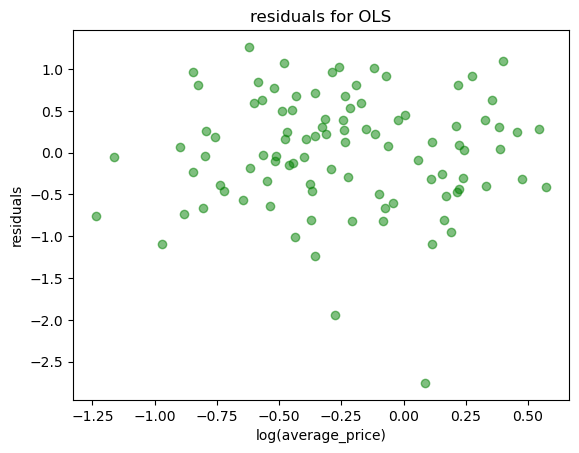

In [11]:
fig_err, ax_err = plt.subplots()
ax_err.scatter(raw_data["lavgprc"], model_ols_results.resid, c="green", alpha=0.5, marker='o')
ax_err.set_xlabel("log(average_price)")
ax_err.set_ylabel("residuals")
ax_err.set_title("residuals for OLS")

### Predicting price using `speed2`, `wave2`, `speed3` and `wave3`


In [19]:
# this model also includes day-of-the-week dummies
model_1st = "avgprc~speed2+wave2+speed3+wave3+mon+tues+wed+thurs"
model_1st = smf.ols(formula=model_1st, data=raw_data)
model_1st_results = model_1st.fit()
print(model_1st_results.summary())
print(model_1st_results.f_test("wave2 = 0, speed2 = 0, wave3 = 0, speed3 = 0")) # The F-test rejects the hypothesis speedX and waveX are not predictive of price

                            OLS Regression Results                            
Dep. Variable:                 avgprc   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     6.315
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.90e-06
Time:                        12:08:16   Log-Likelihood:                -11.637
No. Observations:                  97   AIC:                             41.27
Df Residuals:                      88   BIC:                             64.45
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1590      0.137      1.164      0.2

### Two-stage IV estimates

In [23]:
raw_data["fri"] = 1-raw_data["mon"]-raw_data["tues"]-raw_data["wed"]-raw_data["thurs"]
exog_labels = ["lavgprc", "mon", "tues", "wed", "thurs", "fri"]
inst_labels = ["speed2", "wave2", "speed3", "wave3", "mon", "tues", "wed", "thurs", "fri"]

iv2sls_model = IV2SLS(endog=raw_data['ltotqty'], exog=raw_data[exog_labels], instrument=raw_data[inst_labels])
iv2sls_model_results = iv2sls_model.fit()
print(iv2sls_model_results.summary())

                          IV2SLS Regression Results                           
Dep. Variable:                ltotqty   R-squared:                       0.193
Model:                         IV2SLS   Adj. R-squared:                  0.148
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Mon, 04 Mar 2024                                         
Time:                        12:17:53                                         
No. Observations:                  97                                         
Df Residuals:                      91                                         
Df Model:                           5                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lavgprc       -0.8207      0.327     -2.508      0.0

In [25]:
# The same estimates done for white buyers separately

raw_data["lprcw"] = np.log(raw_data["prcw"])
raw_data["lqtyw"] = np.log(raw_data["qtyw"])
exog_labels = ["lprcw", "mon", "tues", "wed", "thurs", "fri"]
inst_labels = ["speed2", "wave2", "speed3", "wave3", "mon", "tues", "wed", "thurs", "fri"]

iv2sls_model_w = IV2SLS(endog=raw_data['lqtyw'], exog=raw_data[exog_labels], instrument=raw_data[inst_labels])
iv2sls_model_wresults = iv2sls_model_w.fit()
print(iv2sls_model_wresults.summary())

                          IV2SLS Regression Results                           
Dep. Variable:                  lqtyw   R-squared:                       0.195
Model:                         IV2SLS   Adj. R-squared:                  0.151
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Mon, 04 Mar 2024                                         
Time:                        12:35:53                                         
No. Observations:                  97                                         
Df Residuals:                      91                                         
Df Model:                           5                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lprcw         -0.8172      0.377     -2.166      0.0

In [26]:
# The same estimates done for asian buyers separately

raw_data["lprca"] = np.log(raw_data["prca"])
raw_data["lqtya"] = np.log(raw_data["qtya"])
exog_labels = ["lprca", "mon", "tues", "wed", "thurs", "fri"]
inst_labels = ["speed2", "wave2", "speed3", "wave3", "mon", "tues", "wed", "thurs", "fri"]

iv2sls_model_a = IV2SLS(endog=raw_data['lqtya'], exog=raw_data[exog_labels], instrument=raw_data[inst_labels])
iv2sls_model_aresults = iv2sls_model_a.fit()
print(iv2sls_model_aresults.summary())

                          IV2SLS Regression Results                           
Dep. Variable:                  lqtya   R-squared:                       0.155
Model:                         IV2SLS   Adj. R-squared:                  0.108
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Mon, 04 Mar 2024                                         
Time:                        12:36:08                                         
No. Observations:                  97                                         
Df Residuals:                      91                                         
Df Model:                           5                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lprca         -0.8372      0.383     -2.184      0.0